# About this project

Pada project ini, kita akan menggunakan dataset pinjaman untuk small business bersumber dari US Small Business Administration (SBA) untuk membangun model klasifikasi yang dapat memprediksi apakah suatu pinjaman akan default (gagal bayar) atau tidak berdasarkan faktor-faktor pada data yang tersedia. Tujuan utama proyek ini adalah untuk membantu lembaga keuangan dalam membuat decision yang lebih baik mengenai pemberian pinjaman.

Tujuan project:
- Membuat model prediksi yang dapat mengklasifikasikan pinjaman menjadi dua kategori, yaitu: CHGOFF (gagal bayar) atau P I F (paid in full / lunas)
- Memberikan rekomendasi bisnis berdasarkan hasil analisis, EDA, dan model yang dibangun.
- Mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi status pinjaman.

Dataset yang digunakan dalam proyek ini adalah SBAnational.csv, yang berisi informasi tentang pinjaman SBA dari tahun 1987 hingga 2014

Output:
- Hasil analisis EDA yang dilakukan
- Model prediksi yang dapat memprediksi seakurat mungkin apakah suatu pinjaman akan default atau lunas.
- Evaluasi kinerja model untuk setiap model yang dibangun
- Business recommendation & insight

Metric utama: Recall

# Penjelasan masing-masing kolom dataset

- LoanNr_ChkDgt: Kode nomor unique untuk setiap pinjaman. Kolom ini berguna sebagai identifier, namun di project ini tidak akan digunakan sebagai fitur dalam model karena sifatnya unique dan tidak membantu pembuatan model.

- Name: Nama peminjam. Ini juga bersifat unique dan tidak akan digunakan dalam pembuatan model.

- City: Kota asal peminjam.

- State: Negara bagian peminjam.

- Zip: Kode pos peminjam.

- Bank: Nama bank dalam melakukan pinjaman.

- BankState: Negara bagian bank dalam melakukan pinjaman.

- NAICS: The North American Industry Classification System. Kode sistem untuk mengklasifikasi Industri Amerika.

- ApprovalDate: Tanggal persetujuan pinjaman diberikan.

- ApprovalFY: Tahun fiskal persetujuan pinjaman diberikan.

- Term: Jangka waktu pinjaman (dalam satuan bulan).

- NoEmp: Jumlah karyawan di bisnis peminjam.

- NewExist: Indikator apakah bisnis peminjam adalah baru atau sudah ada (1 = Existing business, 2 = New business).

- CreateJob: Jumlah pekerjaan yang diciptakan. Ini bisa menjadi indikator dampak sosial dari pinjaman.

- RetainedJob: Jumlah pekerjaan yang dipertahankan. Maksudnya adalah jumlah pekerjaan sejak awal pinjaman dilakukan sampai pelunasan atau default

- FranchiseCode: Kode franchise

- UrbanRural: Indikator apakah bisnis berada di daerah urban atau rural. Bisa digunakan untuk analisis geografis.

- RevLineCr: Indikator apakah pinjaman ini adalah kredit bergulir atau tidak. Kredit bergulir maksudnya adalah sistem penarikan dana sesuai dengan kebutuhan debitur kapanpun, asalkan tidak lebih dari limit.

- LowDoc: Indikator apakah pinjaman diproses melalui program LowDoc. LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed. (Source: https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/)

- ChgOffDate: Tanggal pinjaman dinyatakan gagal bayar.

- DisbursementDate: Tanggal pencairan pinjaman. Jika ApprovalDate adalah tanggal pinjaman diapprove, DisbursementDate adalah tanggal pencairan pinjaman tersebut ke rekening bank peminjam.

- DisbursementGross: Jumlah pinjaman yang dicairkan.

- BalanceGross: Jumlah outstanding pinjaman. jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut

- MIS_Status: Status pinjaman (charged off atau paid in full). Ini adalah variabel target untuk model klasifikasi ini.

- ChgOffPrinGr: Jumlah pokok yang gagal bayar.

- GrAppv: Jumlah pinjaman yang disetujui oleh bank.

- SBA_Appv: Jumlah yang dijamin oleh SBA.



# Libraries

In [1]:
!pip install uszipcode
!pip install 'sqlalchemy_mate>=1.4.28.3,<2.0.0.0'

!pip install scikit-plot

  Using cached uszipcode-1.0.1-py2.py3-none-any.whl (35 kB)
  Using cached pathlib_mate-1.3.2-py3-none-any.whl (56 kB)
  Using cached atomicwrites-1.4.1.tar.gz (14 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.7 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=004c186facf2b994636d23221193cd6196ab2b9b7f142cb04c5eb89f74195133
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Using cached sqlalchemy_mate-1.4.28.4-py2.py3-none-any.whl (77 kB)
  Using cached SQLAlchemy-1.4.52-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
  Attempting uninstall: sql

In [186]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uszipcode
from uszipcode import SearchEngine

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Data check

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.zip', 'r')
zip_ref.extractall('content/dataset')
zip_ref.close()

In [5]:
file_path = '/content/content/dataset/SBAnational.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

<ipython-input-5-7e72fbfed50c>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
#file_path = '/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.csv'
#df = pd.read_csv(file_path)
#df = df.sample(n=500000, random_state=42)
#pd.set_option('display.max_columns', None)

In [7]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [9]:
# Cek apakah benar LoanNr_ChkDgt berisi unique loan ID
df[df['LoanNr_ChkDgt'].duplicated() == True]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


Observations:
1. Terdapat missing values pada kolom: `City`, `Bank`, `BankState`, `NewExist`, `RevLineCr`, `LowDoc`, `ChgOffDate`, `DisbursementDate`, `MIS_Status`.

Notes: `ChgOffDate` tidak ada input / na / missing value jika `MIS_Status`nya = `CHGOFF`. Jadi tidak perlu handling.

2. `LoanNr_ChkDgt` berisi unique values dan merepresentasikan ID dari setiap pengajuan loan. Kolom ini tidak akan berguna untuk modeling kita, dan akan didrop.
3. `ApprovalDate`, `ChgOffDate`, `DisbursementDate` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.
4. `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `GrAppv`, `SBA_Appv` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.

Notes: Harus remove simbol '$' juga

# Split to prevent leakage on preprocessing

### Isi `MIS_Status` dengan ketersediaan data `ChgOffDate`

In [10]:
# Yang value `ChgOffDate` ada tapi `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna() == False) & (df['MIS_Status'].isna())].shape[0]

261

In [11]:
# Yang value `ChgOffDate` tidak ada dan `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna()) & (df['MIS_Status'].isna())].shape[0]

1736

In [12]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [13]:
df['MIS_Status'] = np.where(df['ChgOffDate'].isna(), 'P I F', 'CHGOFF')

In [14]:
df['MIS_Status'].isna().sum()

0

## Split

In [15]:
X = df.drop(columns=['MIS_Status'])
y = df['MIS_Status']

train_indices, test_indices = train_test_split(df.index, test_size=0.3, random_state=42, stratify=y)
df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

print("Training set size:", df_train.shape)
print("Test set size:", df_test.shape)

Training set size: (629414, 27)
Test set size: (269750, 27)


# Missing values handling

### Train dataframe

In [16]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                     7
City                    20
State                    8
Bank                  1120
BankState             1125
NewExist                91
RevLineCr             3145
LowDoc                1802
ChgOffDate          515525
DisbursementDate      1673
dtype: int64


In [17]:
missing_pct = df_train.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.002224
State                             0.000890
Bank                              0.124560
BankState                         0.125116
NewExist                          0.010121
RevLineCr                         0.349769
LowDoc                            0.200408
ChgOffDate                       57.333812
DisbursementDate                  0.186062


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [18]:
df_train[(df_train['City'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",NaN,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,NaN,NE,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
342946,3391472004,CLARK TIRE COMPANY,NaN,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",NaN,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
410933,3970882003,"DOVER GRAPHICS,INC.",NaN,MO,64106,EDC LOAN CORPORATION,MO,0,12-Mar-81,1981,240,12,1.0,0,0,0,0,N,N,NaN,1-Jun-81,"$50,000.00",$0.00,P I F,$0.00,"$52,000.00","$52,000.00"
570342,5622822010,HMC PROPERTIES,NaN,NC,28402,WILMINGTON BUS. DEVEL,NC,0,13-Jul-81,1981,240,37,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$47,000.00",$0.00,P I F,$0.00,"$47,000.00","$47,000.00"


In [19]:
df_train[(df_train['State'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
885335,9690723000,"VERANDA INTERIORS, INC.",A452638533,NaN,76645,PROSPERITY BANK,TX,0,24-Oct-96,1997,120,3,1.0,0,0,1,0,N,N,NaN,31-Jan-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,120,1,2.0,0,0,0,0,N,N,5-Mar-90,NaN,$0.00,$0.00,CHGOFF,"$11,364.00","$15,000.00","$15,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
869948,9390913007,"OLSON ELECTRIC SERVICE, INC.",A452638533,NaN,75236,PROSPERITY BANK,TX,235310,9-Jul-96,1996,60,17,1.0,0,0,1,0,N,Y,NaN,31-Jul-96,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [20]:
search = SearchEngine()

imputed_rows = []

filter = df_train[(df_train['City'].isnull()) | (df_train['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_train.loc[i, 'Zip'])
  if zipcode:
    df_train.loc[i, 'City'] = zipcode.major_city
    df_train.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_train.loc[imputed_rows]

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",Chicago,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,Des Moines,IA,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
342946,3391472004,CLARK TIRE COMPANY,Saint Louis,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
351072,3445553007,JAMES A. NICHOLS,El Paso,TX,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",Louisville,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
367007,3563473008,P & P TOOL INC,Somerset,WI,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",Palm Beach Gardens,FL,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"


Kita lakukan sanity check untuk `City` setelah dilakukan imputasi.

In [21]:
df_train['City'].isna().sum()

2

In [22]:
df_train[(df_train['City'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
437818,4247702001,GEMCO NARROW FABRICS INC,NaN,MA,2165,BAY COLONY DEVEL CORP,MA,0,18-Sep-81,1981,180,50,1.0,0,0,0,0,N,N,NaN,10-Feb-82,"$95,000.00",$0.00,P I F,$0.00,"$95,000.00","$95,000.00"


Ternyata ada `City` yang `Zip` codenya tidak terdetect. Setelah kita cek `Zip` codenya, ternyata itu adalah `Zip` code negara bukan North America, dan ada `Zip` code yang kosong. Kemungkinan itu adalah kesalahan input. Itu decisionnya kita drop saja rownya

In [23]:
df_train = df_train.dropna(subset=['City'])

In [24]:
df_train['City'].isna().sum()

0

Kita lakukan sanity check untuk `State` setelah dilakukan imputasi.

In [25]:
df_train['State'].isna().sum()

1

In [26]:
df_train[(df_train['State'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"


In [27]:
df_train = df_train.dropna(subset=['State'])

In [28]:
df_train['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Setelah dianalisa, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [29]:
df_train['Bank'] = df_train['Bank'].fillna(df_train['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [30]:
df_train['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Pertama, saya akan mengecek apakah kolom `BankState` memiliki hubungan dengan kolom `State`. Apakah data peminjam pada dataset ini, `BankState`nya sama dengan `State` untuk polanya.

In [31]:
# Jumlah data pada dataset
df_train.shape[0]

629411

In [32]:
# Jumlah data dimana `BankState` dari peminjam sama dengan `State`nya
df_train[df_train['BankState'] == df_train['State']].shape[0]

331567

In [33]:
# Jumlah data dimana `BankState` dari peminjam tidak sama dengan `State`nya
df_train[df_train['BankState'] != df_train['State']].shape[0]

297844

Observations:

Ternyata, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [34]:
df_train['BankState'] = df_train['BankState'].fillna(df_train['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [35]:
df_train['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

`NewExist` merupakan indikator apakah peminjam melakukan peminjaman untuk bisnisnya yang sudah ada sebelumnya, atau baru. Nilainya 1 = Existing business, 2 = New business. Kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut

In [36]:
df_train['NewExist'] = df_train['NewExist'].fillna(df_train['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [37]:
df_train['NewExist'].isna().sum()

0

**HANDLING `RevLineCr` IMPUTATION**

Kolom `RevLineCr` ini aneh. Karena di dokumentasi dataset, dijelaskan bahwa `RevLineCr` ini merupakan keterangan apakah jenis kredit yang diberikan adalah revolving credit atau tidak, dan hanya berisi Y = Yes, N = No.

Namun setelah dilakukan pengecekan, ternyata unique valuesnya ada banyak, dan jumlahnya juga acak dan banyak.

In [38]:
df['RevLineCr'].value_counts()

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

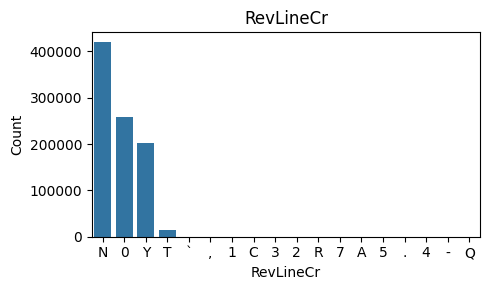

In [39]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Observations:

Berdasarkan keacakan data dari `RevLineCr`, yang menyimpang dari dokumentasi. Jika saya lakukan imputasi berdasarkan "feeling" saya, kemungkinan data malah menjadi kotor dan tidak bersifat asli lagi karena diotak atik, dan belum tentu persepsi imputasi saya itu benar.

Oleh karena itu, di sini saya memutuskan untuk drop kolom `RevLineCr` seluruhnya karena penyimpangan ini, baik untuk `df_train` maupun `df_test`

In [40]:
df_train = df_train.drop(axis=1, columns=['RevLineCr'])
df_test = df_test.drop(axis=1, columns=['RevLineCr'])

**HANDLING `LowDoc` IMPUTATION**

Berdasarkan https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/

LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed.

Mengutip dari https://www.lendingtree.com/business/no-doc-loans/:

*Low or no-doc short-term loans, the loan amounts start at a few thousand dollars and can reach as high as $100,000.*

In [41]:
df_train['LowDoc'].value_counts()

LowDoc
N    547998
Y     77205
0      1061
C       523
S       409
A       356
R        56
1         1
Name: count, dtype: int64

Observations:

Pada dokumentasi dituliskan bahwa `LowDoc` berisi nilai Y = Yes, N = No. Tapi realitanya terdapat value lain selain Y dan N. Maka, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 100.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 100.000

Namun sebelumnya `GrAppv` harus kita betulkan terlebih dahulu ke tipe data Int dari Object.

In [42]:
# Before
df_train['GrAppv'].head(3)

695016     $10,000.00 
488153     $83,900.00 
532245    $173,300.00 
Name: GrAppv, dtype: object

In [43]:
# Hapus $, koma, dan spasi di awal dan akhir string (df_train)
df_train['GrAppv'] = df_train['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_train['GrAppv'] = pd.to_numeric(df_train['GrAppv'], errors='coerce')
df_train['GrAppv'] = df_train['GrAppv'].astype(int)

# Hapus $, koma, dan spasi di awal dan akhir string (df_test)
df_test['GrAppv'] = df_test['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_test['GrAppv'] = pd.to_numeric(df_test['GrAppv'], errors='coerce')
df_test['GrAppv'] = df_test['GrAppv'].astype(int)

In [44]:
# After
df_train['GrAppv'].head(3)

695016     10000
488153     83900
532245    173300
Name: GrAppv, dtype: int64

Jika `LowDoc` != `Y` dan `LowDoc` != `N`, artinya valuenya ngaco. Jika value ngaco nya memiliki `GrAppv` <= 100.000, pinjaman ini memenuhi kriteria low doc loan. Walaupun belum tentu peminjam mengajukan pinjamannya sebagai low doc loan, namun untuk value ngaco `LowDoc` <= 100.000 akan kita anggap sebagai low doc loan.

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 100.000, kita imputasi sebagai `Y`

In [45]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)].shape[0]

2231

In [46]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [47]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)].shape[0]

1977

In [48]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [49]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)].shape[0]

0

In [50]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)].shape[0]

0

In [51]:
df_train['LowDoc'].isna().sum()

0

**`ChgOffDate` HANDLING**

`ChgoffDate` adalah kolom tanggal suatu pinjaman dinyatakan gagal bayar.

In [52]:
# Jumlah yang null, artinya MIF_Status nya 'ChgOff'
df_train[df_train['ChgOffDate'].isna()].shape[0]

515523

In [53]:
# Jumlah yang not null, artinya MIF_Status nya 'P I F'
df_train[df_train['ChgOffDate'].isna() == False].shape[0]

113888

Sebetulnya NA pada kolom `ChgOffDate` ini artinya adalah pinjaman tersebut `MIF_Status`nya berisi 'P I F'. Dimana artinya NA pada kolom ini menandakan bahwa pinjaman ini tidak memiliki charge off date karena pinjaman dilunasi dengan baik.

Dan juga, `ChgOffDate` sebetulnya mengartikan hal yang sama persis dengan `MIF_Status`, yaitu menandakan apakah customer tersebut melunasi pinjamannya atau gagal bayar. Oleh karena itu, decision pada kolom `ChgOffDate` ini adalah akan didrop seluruhnya.

In [54]:
df_train = df_train.drop(axis=1, columns=['ChgOffDate'])
df_test = df_test.drop(axis=1, columns=['ChgOffDate'])

**`DisbursementDate` HANDLING**

Observations:

`DisbursementDate` tidak bisa dilakukan imputasi berdasarkan mode. Karena secara logika akan menjadi tidak masuk akal. `DisbursementDate` merupakan tanggal dimana pencairan dana oleh SBA dilakukan. `DisbursementDate` pasti waktunya lebih di atas dari `ApprovalDate`. Karena suatu pinjaman pasti harus diapprove dulu, dan berdasarkan analisa dari dataset, sejak suatu pinjaman diapprove sampai dicairkan membutuhkan rentang waktu.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [55]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                   7
DisbursementDate    1673
dtype: int64


### Test dataframe

In [56]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                  7
City                 10
State                 6
Bank                439
BankState           441
NewExist             45
LowDoc              780
DisbursementDate    695
dtype: int64


In [57]:
missing_pct = df_test.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.001112
State                             0.000667
Bank                              0.048823
BankState                         0.049046
NewExist                          0.005005
LowDoc                            0.086747
DisbursementDate                  0.077294


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [58]:
df_test[(df_test['City'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,NaN,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,NaN,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,NaN,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
270268,2884202008,"SAN DIEGO REFRIGERATD SVCS,INC",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,26-Jun-81,1981,180,28,1.0,0,0,0,0,N,10-Sep-81,"$407,000.00",$0.00,P I F,$0.00,407000,"$407,000.00"
378899,3662512006,AMERICAN MANAGEMENT ENG ASS IN,NaN,TX,78204,"ACCION TEXAS, INC.",TX,0,2-Jun-81,1981,300,0,1.0,0,0,0,0,N,9-Sep-81,"$74,000.00",$0.00,P I F,$0.00,74000,"$74,000.00"


In [59]:
df_test[(df_test['State'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"
871847,9416233003,METRO SHEETMETAL & ERECTION,A452638533,NaN,76052,PROSPERITY BANK,TX,235610,23-Jul-96,1996,84,3,1.0,0,0,1,0,Y,31-Jul-96,"$80,000.00",$0.00,P I F,$0.00,80000,"$64,000.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,250000,"$212,500.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,83000,"$83,000.00"
385418,3714383003,"LAKE MOVIE TYMES, INC.",LAKE OZARK,NaN,65049,CENTRAL BK OF LAKE OF OZARKS,MO,532230,4-Jan-90,1990,60,1,1.0,0,0,1,0,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,75000,"$67,500.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [60]:
search = SearchEngine()

imputed_rows = []

filter = df_test[(df_test['City'].isnull()) | (df_test['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_test.loc[i, 'Zip'])
  if zipcode:
    df_test.loc[i, 'City'] = zipcode.major_city
    df_test.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_test.loc[imputed_rows]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,Casco,WI,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",Chicago,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,Beaufort,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,Cleveland,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,Salt Lake City,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,Quincy,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
328526,3280213000,KING'S TRUCK WASH,Wichita,KS,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"


Exception ignored in: <function SearchEngine.__del__ at 0x7e95c484aef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

Kita lakukan sanity check untuk `City` setelah dilakukan imputasi.

In [61]:
df_test['City'].isna().sum()

0

Kita lakukan sanity check untuk `State` setelah dilakukan imputasi.

In [62]:
df_test['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Sama seperti missing value handling pada `df_train`, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [63]:
df_test['Bank'] = df_test['Bank'].fillna(df_test['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [64]:
df_test['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Berdasarkan hasil observasi missing value handling `BankState` pada `df_train`, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kesimpulan tersebut juga sama untuk `df_test` ini. Kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` di sini juga kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [65]:
df_test['BankState'] = df_test['BankState'].fillna(df_test['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [66]:
df_test['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

Berdasarkan observasi dari `df_train` sebelumnya, kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut.

In [67]:
df_test['NewExist'] = df_test['NewExist'].fillna(df_test['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [68]:
df_test['NewExist'].isna().sum()

0

**HANDLING `LowDoc` IMPUTATION**

Sama seperti `df_train`, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 100.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 100.000

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 100.000, kita imputasi sebagai `Y`

In [69]:
df_test['LowDoc'].value_counts()

LowDoc
N    234821
Y     33130
0       430
C       235
S       194
A       141
R        19
Name: count, dtype: int64

In [70]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)].shape[0]

991

In [71]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [72]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)].shape[0]

808

In [73]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [74]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)].shape[0]

0

In [75]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)].shape[0]

0

In [76]:
df_test['LowDoc'].isna().sum()

0

**`DisbursementDate` HANDLING**

Sama seperti `DisbursementDate` pada `df_train`, kolom ini tidak bisa dilakukan imputasi karena informasinya akan tidak makes sense.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [77]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                  7
DisbursementDate    695
dtype: int64


# Duplicate Values Handling

## Train dataframe

In [78]:
print('Total duplicate data: ', df_train.duplicated().sum())

Total duplicate data:  0


## Test dataframe

In [79]:
print('Total duplicate data: ', df_test.duplicated().sum())

Total duplicate data:  0


No duplicate data found. Kita lanjut

# Feature Engineering

## Wrong data type handlings

Di sini, kita akan cek lebih lanjut dan detail per masing-masing kolom, apakah masih ada format yang tidak sesuai

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629411 entries, 695016 to 225325
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      629411 non-null  int64  
 1   Name               629404 non-null  object 
 2   City               629411 non-null  object 
 3   State              629411 non-null  object 
 4   Zip                629411 non-null  int64  
 5   Bank               629411 non-null  object 
 6   BankState          629411 non-null  object 
 7   NAICS              629411 non-null  int64  
 8   ApprovalDate       629411 non-null  object 
 9   ApprovalFY         629411 non-null  object 
 10  Term               629411 non-null  int64  
 11  NoEmp              629411 non-null  int64  
 12  NewExist           629411 non-null  float64
 13  CreateJob          629411 non-null  int64  
 14  RetainedJob        629411 non-null  int64  
 15  FranchiseCode      629411 non-null  int64  
 16  Ur

In [81]:
df_train.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,25-Feb-04,2004,84,1,1.0,1,1,1,0,N,29-Feb-04,"$10,000.00",$0.00,P I F,$0.00,10000,"$8,500.00"
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,20-Jul-01,2001,28,8,1.0,0,0,1,2,Y,30-Sep-01,"$83,900.00",$0.00,CHGOFF,"$74,364.00",83900,"$71,315.00"
532245,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,31-Jan-02,2002,144,6,1.0,0,6,1,2,N,28-Feb-02,"$173,300.00",$0.00,P I F,$0.00,173300,"$129,975.00"


### `ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime

**`ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime**

In [82]:
cols = ['ApprovalDate', 'DisbursementDate']

for col in cols:
  df_train[col] = pd.to_datetime(df_train[col])
  df_test[col] = pd.to_datetime(df_test[col])

<ipython-input-82-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-82-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test[col] = pd.to_datetime(df_test[col])
<ipython-input-82-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-82-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

### `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY` diubah ke Int

**`DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY`, `NewExist` diubah ke Int**

In [83]:
cols_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv']

for col in cols_to_convert:
    df_train[col] = df_train[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_train[col] = df_train[col].astype(int)

    df_test[col] = df_test[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    df_test[col] = df_test[col].astype(int)

Notes:

Ada wrong value pada `ApprovalFY`, dimana ketika dilakukan konversi ke integer, muncul error *ValueError: invalid literal for int() with base 10: '1976A'* yang kemungkinan terjadi karena kesalahan.

Oleh karena itu, kita harus ubah 1976A itu ke 1976 dulu

In [84]:
df_train[df_train['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
776367,8209901003,FIVE LETTER DELI & GROCERY INC,ST ALBANS,NY,11412,"CITIBANK, N.A.",SD,0,1976-07-15,1976A,60,4,2.0,0,0,0,0,N,1976-10-28,40000,0,CHGOFF,0,40000,36000
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,84,5,1.0,0,0,0,0,N,NaT,73000,0,CHGOFF,827,73000,40150
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,60,2,2.0,0,0,0,0,N,1976-08-09,15000,0,CHGOFF,475,15000,13500
788539,8375031008,"HOWARD S. CULVER, INC.",HEBRON,MD,21830,WELLS FARGO BANK NATL ASSOC,MD,0,1976-09-30,1976A,120,39,1.0,0,0,0,0,N,1976-10-21,275000,0,CHGOFF,218205,275000,247500
781090,8273621007,GILA VALLEY BLOCK CO (SUB),SAFFORD,AZ,85711,FDIC/SOUTHWESTERN BANK,CA,0,1976-07-21,1976A,120,22,1.0,0,0,0,0,N,1976-08-02,500000,0,CHGOFF,361052,500000,450000
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,120,3,2.0,0,0,0,0,N,NaT,550000,0,CHGOFF,572877,550000,495000
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,120,9,1.0,0,0,0,0,N,1977-01-03,72000,0,CHGOFF,8509,72000,64800
780120,8260831001,"WALKER-NEER MANUFACTURING CO.,",WICHITA FALLS,TX,76307,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-29,1976A,174,110,1.0,0,0,0,0,N,1977-01-28,650000,0,CHGOFF,253484,750000,499500
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,1976-09-10,1976A,120,5,2.0,0,0,0,0,N,1977-02-07,145000,0,CHGOFF,0,145000,130500
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,84,3,1.0,0,0,0,0,N,1976-09-20,94500,0,CHGOFF,63182,94500,85050


In [85]:
# Ubah 1976A ke 1976
df_train.loc[df_train['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [86]:
df_test[df_test['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
775978,8204371000,AUTOMOTIVE ELECTRIC REBUILDERS,FAIRBANKS,AK,99701,KEYBANK NATIONAL ASSOCIATION,OR,0,1976-09-01,1976A,240,8,1.0,0,0,0,0,N,1977-04-15,164679,0,CHGOFF,439,165000,148500
784351,8318051007,BAGLEY & COMPANY,SALT LAKE CITY,UT,84111,JPMORGAN CHASE BANK NATL ASSOC,AZ,0,1976-08-19,1976A,180,4,1.0,0,0,0,0,N,1976-12-29,350000,0,CHGOFF,130210,350000,315000
788661,8376951004,WELMET CO LTD,OLD BETHPAGE,NY,11804,DEUTSCHE BK TR CO AMERICAS,NY,0,1976-09-14,1976A,60,130,1.0,0,0,0,0,N,NaT,200000,0,CHGOFF,56948,200000,180000
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,120,36,1.0,0,0,0,0,N,1976-11-23,350000,0,CHGOFF,48361,350000,315000
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,102,10,1.0,0,0,0,0,N,1976-09-15,150000,0,CHGOFF,87037,150000,135000
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,120,29,1.0,0,0,0,0,N,1976-12-01,325000,0,CHGOFF,45910,325000,292500


In [87]:
# Ubah 1976A ke 1976
df_test.loc[df_test['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [88]:
df_train['ApprovalFY'] = df_train['ApprovalFY'].astype(int)
df_test['ApprovalFY'] = df_test['ApprovalFY'].astype(int)

### `NewExist` diubah ke Integer

Ubah `NewExist` ke Integer.

In [89]:
df_train['NewExist'] = df_train['NewExist'].astype(int)
df_test['NewExist'] = df_test['NewExist'].astype(int)

In [90]:
df_train['NewExist'].value_counts()

NewExist
1    451249
2    177427
0       735
Name: count, dtype: int64

In [91]:
df_test['NewExist'].value_counts()

NewExist
1    193754
2     75698
0       298
Name: count, dtype: int64

Ternyata, `NewExist` memiliki 3 unique values, yaitu: 0, 1, 2. Padahal sesuai dokumentasi dari source dataset, values pada `NewExist` hanya berisi 2 values, yaitu:
- 1 = Existing business
- 2 = New business

Dan value `0` di sini tidak jelas apakah ini `Existing business` atau `New business`.

Di sini, saya akan cek komparasi dengan kolom `NoEmp`, yaitu jumlah karyawan di bisnis peminjam. Di sini saya mengartikan kalau bisnis itu memiliki 0 karyawan, artinya bisnis itu adalah `New business` yang belum memiliki karyawan.

Maka:

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` == 0, maka kita assign sebagai 2 (New business)

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` != 0, maka kita assign sebagai 1 (Existing business)

In [92]:
rule1 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] == 0)]
rule2 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] != 0)]

rule3 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] == 0)]
rule4 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] != 0)]

for i in rule1.index:
  df_train.loc[i, 'NewExist'] = 2

for i in rule2.index:
  df_train.loc[i, 'NewExist'] = 1

for i in rule3.index:
  df_test.loc[i, 'NewExist'] = 2

for i in rule4.index:
  df_test.loc[i, 'NewExist'] = 1

Kita lakukan sanity check

In [93]:
df_train['NewExist'].value_counts()

NewExist
1    451981
2    177430
Name: count, dtype: int64

In [94]:
df_test['NewExist'].value_counts()

NewExist
1    194052
2     75698
Name: count, dtype: int64

Semua value sudah benar

## Pembuatan feature

### `NAICS` to `IndSec`

In [95]:
df_train['NAICS'].value_counts()

NAICS
0         141293
722110     19757
722211     13592
811111     10185
621210      9753
           ...  
212210         1
339910         1
311311         1
111160         1
311351         1
Name: count, Length: 1302, dtype: int64

NAICS adalah sistem klasifikasi industri di US. Kode NAICS adalah kode enam digit yang spesifik untuk industri, dengan 2 digit pertama adalah kode Sektor Industrinya.

Di sini saya akan membuat feature baru yaitu sektor industri berdasarkan kode NAICS untuk memudahkan analisa dan EDA. Feature baru itu akan dinamakan `IndSec`

Untuk kode NAICS, referensinya didapatkan dari: https://www.census.gov/naics/?58967?yearbck=2022

Notes: Terdapat beberapa `NAICS` yang 2

In [96]:
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing', '32': 'Manufacturing', '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade', '45': 'Retail Trade',
    '48': 'Transportation and Warehousing', '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

In [97]:
df_train['IndSector'] = df_train['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')
df_test['IndSector'] = df_test['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')

### `NAICS` to `IndDefRate`

In [98]:
default_rate = {
    '21': 8, '11': 9, '55': 10, '62': 10, '22': 14, '92': 15,
    '54': 19, '42': 19, '31': 19, '32': 16, '33': 14, '81': 20,
    '71': 21, '72': 22, '44': 22, '45': 23, '23': 23, '56': 24,
    '61': 24, '51': 25, '48': 27, '49': 23, '52': 28, '53': 29
}

In [99]:
df_train['IndDefRate'] = df_train['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)
df_test['IndDefRate'] = df_test['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)

In [100]:
df_train.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14


In [101]:
df_test.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
395280,3808784002,L & S CARRY OUT,HILLIARD,OH,43026,THE HUNTINGTON NATIONAL BANK,OH,0,2000-06-26,2000,243,2,1,0,0,1,1,N,2000-06-30,150000,0,P I F,0,185000,138750,Unknown,0
451751,4380795004,PATRICK LEVINGSTON,Concord,NC,28027,BRANCH BK. & TR CO,NC,722330,2010-11-22,2011,36,2,2,0,2,0,2,N,2010-12-01,16000,0,P I F,0,16000,8000,Accommodation and Food Services,22


### `ApprovalDate` to `year`, `month`, and `date`

`ApprovalDate` kita pecah menjadi format `tahun`, `bulan`, dan `tanggal`

In [102]:
df_train['approval_date_year'] = pd.to_datetime(df_train['ApprovalDate']).dt.year
df_train['approval_date_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.month
df_train['approval_date_day_of_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.day

In [103]:
df_test['approval_date_year'] = pd.to_datetime(df_test['ApprovalDate']).dt.year
df_test['approval_date_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.month
df_test['approval_date_day_of_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.day

### `FranchiseCode` to `Franchise`

In [104]:
df_train['FranchiseCode'].value_counts()

FranchiseCode
1        447122
0        146184
78760      2338
68020      1359
50564       739
          ...  
29579         1
10794         1
61603         1
63635         1
29702         1
Name: count, Length: 2472, dtype: int64

Berdasarkan guideline, nilai `FranchiseCode` yang bernilai 0 atau 1 adalah No Franchise. Artinya:
- If (`FranchiseCode` != 0) & (`FranchiseCode` != 1) Then `Franchise`
- Else `No Franchise`

Kita akan buat kolom baru berdasarkan apakah bisnis ini merupakan Franchise atau bukan, dan menghilangkan kolom `FranchiseCode` untuk membuat lebih simpel

In [105]:
df_train['Franchise'] = df_train['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

In [106]:
df_test['Franchise'] = df_test['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

# Outliers Handling

In [107]:
numerical = ['Zip','NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
             'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross',
             'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'IndDefRate']

For `df_train`

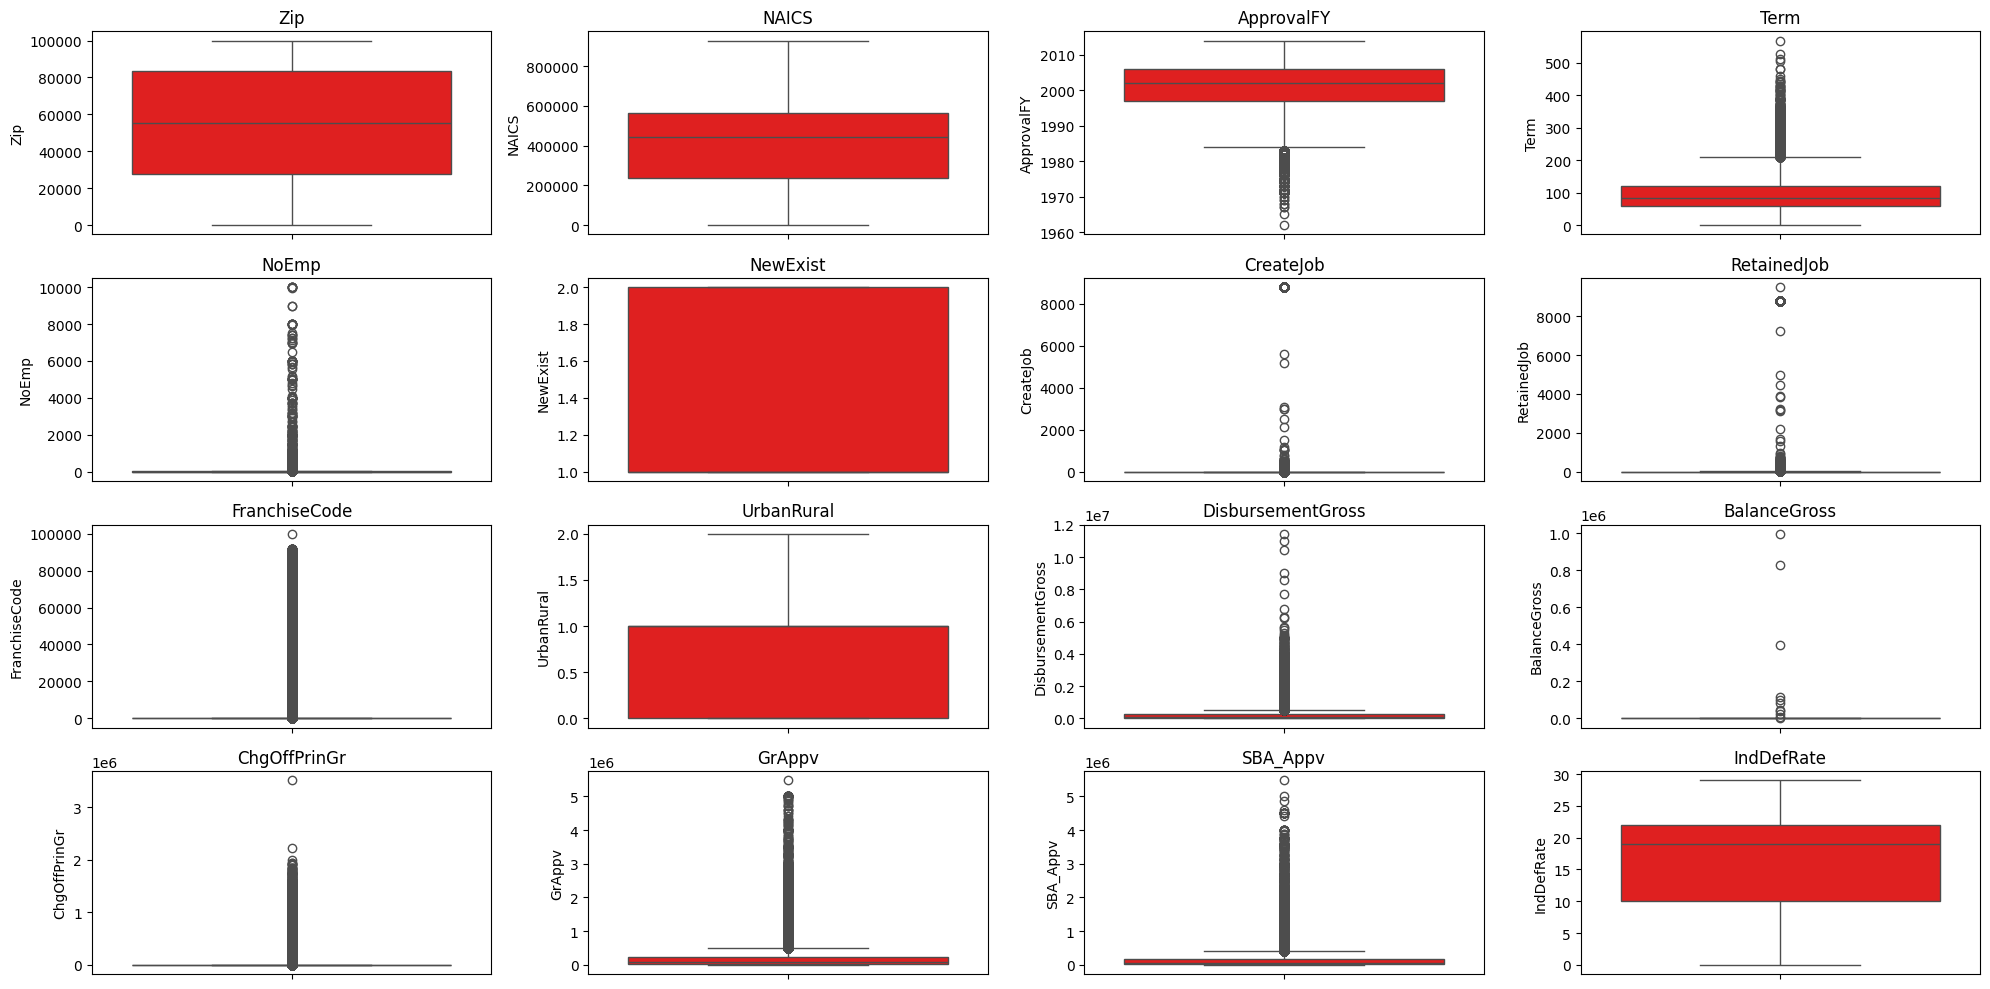

In [108]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_train[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

For `df_test`

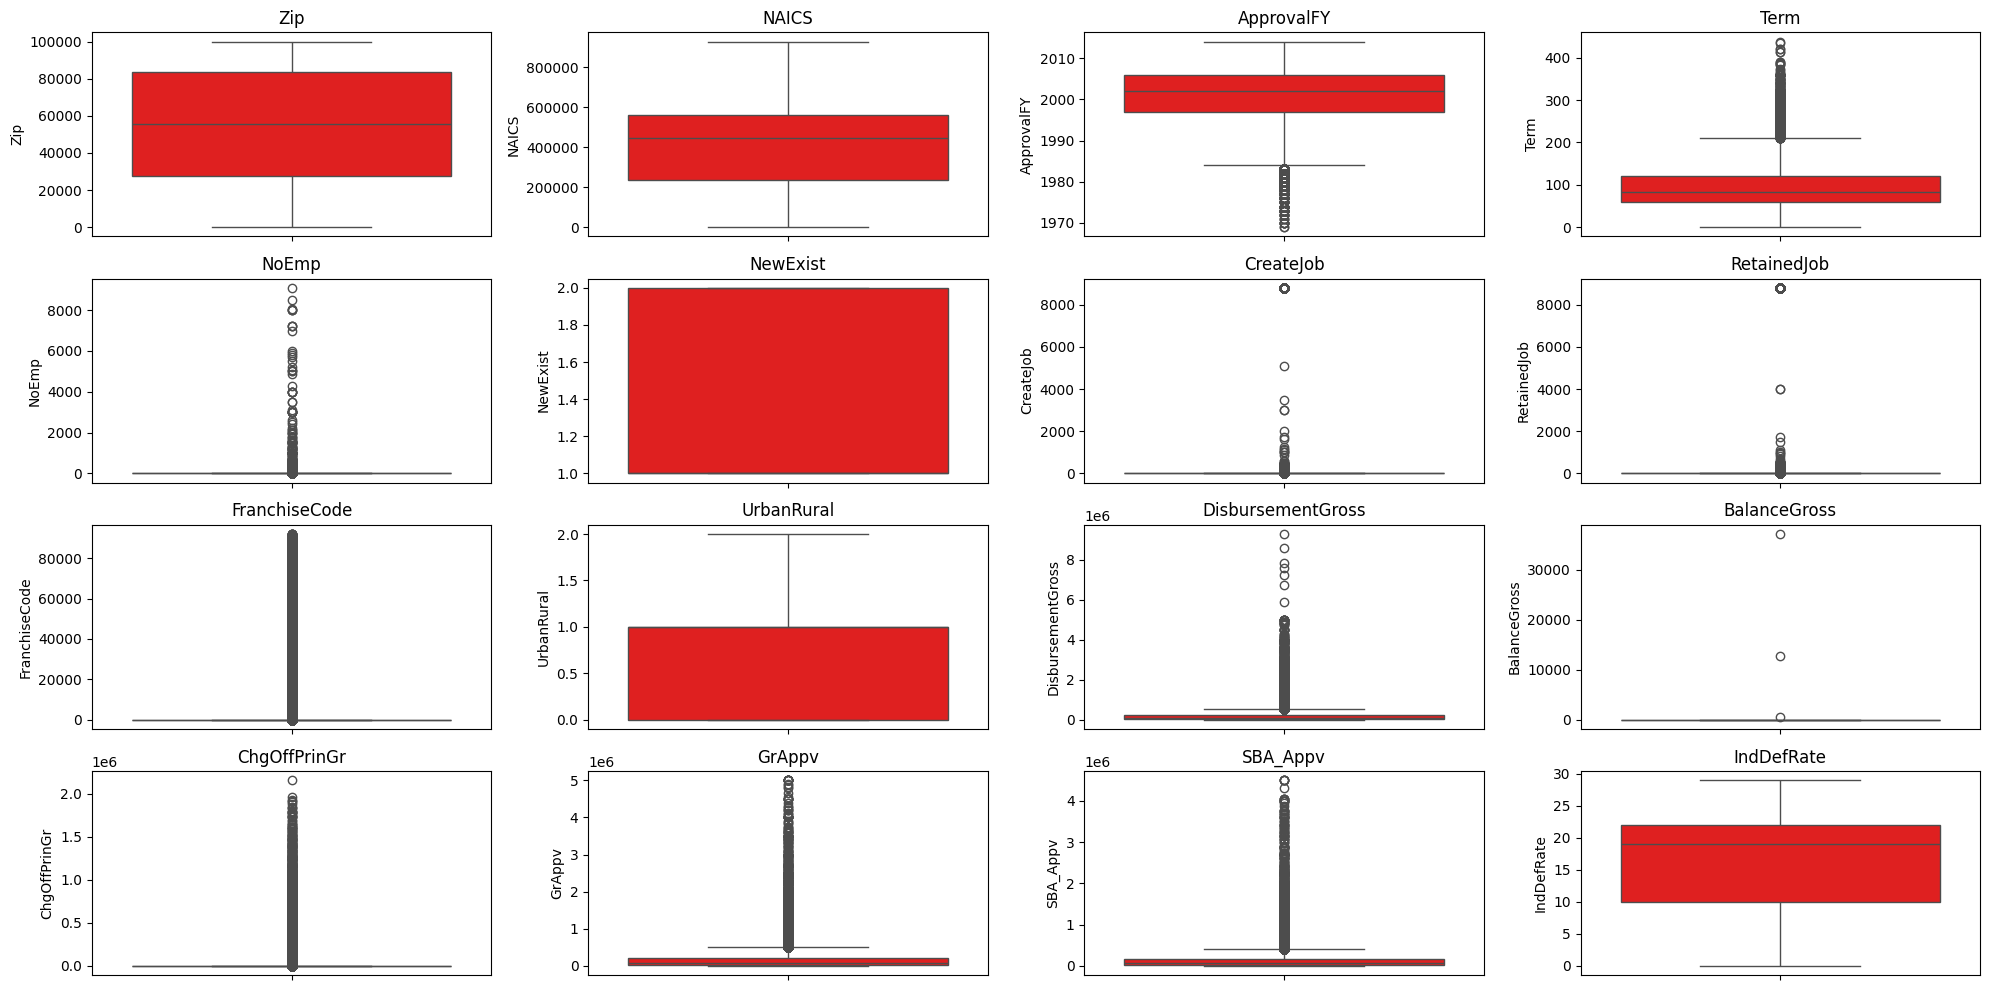

In [109]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_test[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

# EDA

Kita gabungkan `df_train` dan `df_test` menjadi `df_eda` agar proses analisa dan mencari insight lebih mudah.

In [110]:
df_pre_eda = pd.concat([df_train, df_test], ignore_index=True)

In [111]:
df_pre_eda.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise
count,8.991610e+05,899161.000000,899161.000000,899161,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,896793,8.991610e+05,899161.000000,8.991610e+05,8.991610e+05,8.991610e+05,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000
mean,4.772617e+09,53804.565678,398662.280256,2001-06-04 11:42:57.847126656,2001.143644,110.772734,11.411312,1.281516,8.430405,10.797293,2753.735121,0.757751,2001-09-24 03:24:04.077730944,2.011545e+05,2.989359,1.350333e+04,1.926874e+05,1.494891e+05,15.613609,2000.927507,6.483309,16.188804,0.057581
min,1.000014e+09,0.000000,0.000000,1974-01-09 00:00:00,1962.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1974-01-07 00:00:00,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000,1974.000000,1.000000,1.000000,0.000000
25%,2.589765e+09,27587.000000,235210.000000,1996-11-22 00:00:00,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1997-05-31 00:00:00,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,10.000000,1996.000000,4.000000,9.000000,0.000000
50%,4.361454e+09,55410.000000,445310.000000,2002-09-27 00:00:00,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2002-12-31 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04,19.000000,2002.000000,6.000000,16.000000,0.000000
75%,6.904634e+09,83704.000000,561730.000000,2006-01-20 00:00:00,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2006-03-31 00:00:00,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05,22.000000,2006.000000,9.000000,24.000000,0.000000
max,9.996003e+09,99999.000000,928120.000000,2073-12-20 00:00:00,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,2073-12-24 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,29.000000,2073.000000,12.000000,31.000000,1.000000
std,2.538177e+09,31184.064882,263317.745143,NaN,5.913663,78.857162,74.108307,0.449739,236.688560,237.120994,12758.039427,0.646436,NaN,2.876412e+05,1442.164318,6.515240e+04,2.832638e+05,2.284149e+05,9.281754,5.962653,3.361799,8.763470,0.232950


## Anomalies on the data

Ada beberapa kejanggalan pada dataset, seperti:

### Tanggal `ApprovalDate` yang tidak wajar

`ApprovalDate` memiliki minimum value tahun 1974, dan maximum value tahun 2073. Sedangkan dokumentasi dari data ini hanya pada rentang waktu 1987 - 2014.

**`ApprovalDate` yang memiliki tahun di atas 2014**

In [112]:
df_train[df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

99

In [113]:
df_test[df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

39

**`ApprovalDate` yang memiliki tahun di bawah 1987**

In [114]:
df_train[df_train['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

7685

In [115]:
df_test[df_test['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

3300

**Drop tanggal yang tidak wajar**

In [116]:
row_drop_train = df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

row_drop_test = df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

In [117]:
df_train = df_train.drop(row_drop_train)
df_test = df_test.drop(row_drop_test)

Let's do sanity check

In [118]:
df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

0

In [119]:
df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

0

### `Zip` code yang tidak wajar

Terdapat `Zip` code yang nilainya 0 dan 99999, dimana code tersebut tidak exist in real life. Kita akan drop

In [120]:
df_train[(df_train['Zip'] == 0) | (df_train['Zip'] == 99999)].shape[0]

329

In [121]:
df_test[(df_test['Zip'] == 0) | (df_test['Zip'] == 99999)].shape[0]

160

**Drop `Zip` code yang tidak wajar**

In [122]:
row_drop_train = df_train[(df_train['Zip'] == 0) | (df_train['Zip'] == 99999)].index

row_drop_test = df_test[(df_test['Zip'] == 0) | (df_test['Zip'] == 99999)].index

In [123]:
df_train = df_train.drop(row_drop_train)
df_test = df_test.drop(row_drop_test)

Let's do sanity check.

In [124]:
df_train[(df_train['Zip'] == 0) | (df_train['Zip'] == 99999)].shape[0]

0

In [125]:
df_test[(df_test['Zip'] == 0) | (df_test['Zip'] == 99999)].shape[0]

0

## Descriptive Statistics

Mari kita gabungkan `df_train` dan `df_test` kembali setelah dilakukan perbaikan-perbaikan di pre-eda sebelumnya (dimana banyak anomalies pada data)

In [126]:
df_eda = pd.concat([df_train, df_test], ignore_index=True)

In [127]:
df_eda.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise
count,8.875490e+05,887549.000000,887549.000000,887549,887549.000000,887549.000000,887549.000000,887549.000000,887549.000000,887549.000000,887549.000000,887549.000000,885399,8.875490e+05,887549.000000,8.875490e+05,8.875490e+05,8.875490e+05,887549.000000,887549.000000,887549.000000,887549.000000,887549.000000
mean,4.800140e+09,53777.524771,403746.485119,2001-08-19 17:32:06.731256832,2001.367696,109.981009,11.217297,1.281639,2.103752,4.497994,2761.721655,0.767538,2001-12-08 00:53:58.588704,2.011767e+05,3.028469,1.304768e+04,1.925581e+05,1.490036e+05,15.813058,2001.136412,6.481395,16.187456,0.057739
min,1.000014e+09,1.000000,0.000000,1987-01-02 00:00:00,1987.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1986-12-10 00:00:00,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000,1987.000000,1.000000,1.000000,0.000000
25%,2.628345e+09,27526.000000,235610.000000,1997-02-20 00:00:00,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1997-07-31 00:00:00,4.100000e+04,0.000000,0.000000e+00,3.500000e+04,2.100000e+04,10.000000,1997.000000,4.000000,9.000000,0.000000
50%,4.401475e+09,55406.000000,446120.000000,2002-11-08 00:00:00,2003.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2003-02-28 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.000000e+04,20.000000,2002.000000,6.000000,16.000000,0.000000
75%,6.942594e+09,83706.000000,561790.000000,2006-02-02 00:00:00,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2006-04-30 00:00:00,2.360390e+05,0.000000,0.000000e+00,2.250000e+05,1.725000e+05,22.000000,2006.000000,9.000000,24.000000,0.000000
max,9.996003e+09,99950.000000,928120.000000,2014-06-25 00:00:00,2014.000000,569.000000,9999.000000,2.000000,5621.000000,9500.000000,99999.000000,2.000000,2028-06-18 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,29.000000,2014.000000,12.000000,31.000000,1.000000
std,2.534437e+09,31201.750752,261081.824933,NaN,5.598781,78.373337,73.419768,0.449798,15.883734,21.926107,12776.288863,0.644790,NaN,2.889521e+05,1451.567709,6.455059e+04,2.845246e+05,2.293002e+05,9.170604,5.593550,3.361730,8.762852,0.233249


In [128]:
# zip_counts = df_eda['Zip'].value_counts().reset_index()
# zip_counts.columns = ['Zip', 'Count']

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Zip', y='Count', data=zip_counts, palette='viridis')

# plt.title('Distribution of Zip Codes', fontsize=15)
# plt.xlabel('Zip Code', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# plt.show()

# Drop unused columns

In [129]:
df_train.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20,2004,2,25,0
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14,2001,7,20,0
532245,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,2002-01-31,2002,144,6,1,0,6,1,2,N,2002-02-28,173300,0,P I F,0,173300,129975,Other Services (except Public Administration),20,2002,1,31,0


**Drop `LoanNr_ChkDgt`**

`LoanNr_ChkDgt` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi kode peminjaman.

In [130]:
df_train = df_train.drop(columns=['LoanNr_ChkDgt'])
df_test = df_test.drop(columns=['LoanNr_ChkDgt'])

**Drop `Name`**

`Name` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi nama / institusi peminjam

In [131]:
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

**Drop `City`**

Di sini, `City` memiliki unique values yang sangat banyak, dan akan sulit untuk dilakukan encoding. Dan juga sebetulnya informasi dari `City` berkorelasi dengan `Zip`. Karena logikanya kode postal itu sudah merepresentasikan kota. Di sini saya memutuskan untuk drop `City` sebagai predictor

In [132]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values City:', len(df_train['City'].unique()))

Unique Values City: 28081


In [133]:
df_train = df_train.drop(columns=['City'])
df_test = df_test.drop(columns=['City'])

**Drop `Bank`**

`Bank` di sini adalah nama bank yang memberikan dana. Isinya terdiri dari > 5000 unique values, dan `Bank` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [134]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values Bank:', len(df_train['Bank'].unique()))

Unique Values Bank: 5277


In [135]:
df_train = df_train.drop(columns=['Bank'])
df_test = df_test.drop(columns=['Bank'])

**Drop `BankState`**

Sama seperti `Bank` name, `BankState` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [136]:
df_train = df_train.drop(columns=['BankState'])
df_test = df_test.drop(columns=['BankState'])

**Drop `NAICS`**

Kolom `NAICS` sudah kita gunakan untuk membentuk kolom `IndSec` dan `IndDefRate`, dan sekarang statusnya sebetulnya sudah tergantikan dan tidak berguna. Kita akan drop

In [137]:
df_train = df_train.drop(columns=['NAICS'])
df_test = df_test.drop(columns=['NAICS'])

**Drop `ApprovalDate`**

Tanggal persetujuan pinjaman diberikan tidak akan menjadi predictor yang baik sebagai penentu default atau tidaknya pinjaman.

In [138]:
df_train = df_train.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])
df_test = df_test.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])

**Drop `ApprovalFY`**

Tahun fiskal persetujuan pinjaman diberikan sebetulnya pun sama dengan `ApprovalDate`, namun versi tahun. Di sini kita tidak akan menggunakan `ApprovalFY` sebagai predictor.

In [139]:
df_train = df_train.drop(columns=['ApprovalFY'])
df_test = df_test.drop(columns=['ApprovalFY'])

**Drop `FranchiseCode`**

Karena pada Feature Engineering kita sudah membentuk kolom `Franchise` sebagai indikator Franchise atau bukan, kita buang kolom `FranchiseCode`

In [140]:
df_train = df_train.drop(columns=['FranchiseCode'])
df_test = df_test.drop(columns=['FranchiseCode'])

In [141]:
df_train['UrbanRural'].value_counts()

UrbanRural
1    329523
0    218085
2     73690
Name: count, dtype: int64

**Drop `DisbursementDate`**

`DisbursementDate` kita drop karena hanya berisi informasi mengenai tanggal pencarian dana, dan pengaruhnya hampir tidak ada terhadap prediksi default.

In [142]:
df_train = df_train.drop(columns=['DisbursementDate'])
df_test = df_test.drop(columns=['DisbursementDate'])

**Drop `BalanceGross`**

`BalanceGross` merupakan informasi mengenai jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut. Informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [143]:
df_train = df_train.drop(columns=['BalanceGross'])
df_test = df_test.drop(columns=['BalanceGross'])

**Drop `ChgOffPrinGr`**

`ChgOffPrinGr` merupakan jumlah pokok yang gagal bayar. Sama seperti `BalanceGross`, informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [144]:
df_train = df_train.drop(columns=['ChgOffPrinGr'])
df_test = df_test.drop(columns=['ChgOffPrinGr'])

## Should we drop `DisbursementGross` or `GrAppv`?

Di sini, `DisbursementGross` merupakan jumlah pinjaman yang dicairkan, sedangkan `GrAppv` merupakan jumlah pinjaman yang disetujui oleh bank. Sebetulnya kedua kolom ini kemungkinan mempunyai informasi yang sama. Tapi kita akan memastikan di Multicollinearity Check apakah memang kedua kolom ini berkorelasi tinggi atau tidak.

In [145]:
df_train

,State,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndSector,IndDefRate,Franchise
695016,FL,32757,84,1,1,1,1,0,N,10000,P I F,10000,8500,Other Services (except Public Administration),20,0
488153,WI,53076,28,8,1,0,0,2,Y,83900,CHGOFF,83900,71315,Manufacturing,14,0
532245,MT,59270,144,6,1,0,6,2,N,173300,P I F,173300,129975,Other Services (except Public Administration),20,0
785925,FL,32065,84,2,1,0,0,0,Y,78000,P I F,78000,70200,Unknown,0,0
28350,NY,10467,69,3,1,0,3,2,N,73751,CHGOFF,50000,25000,Wholesale Trade,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248236,CA,93401,120,11,1,0,0,0,N,180000,P I F,180000,135000,Retail Trade,22,0
237986,IL,60480,71,4,1,0,4,2,N,50995,CHGOFF,50000,25000,Transportation and Warehousing,27,0
144755,CT,6111,60,3,1,0,3,1,N,80000,P I F,80000,40000,Wholesale Trade,19,0
527642,MA,1730,84,1,1,0,1,1,N,7552,P I F,5000,2500,"Professional, Scientific, and Technical Services",19,0


# Encoding

## Frequency Encoding

In [146]:
df_train.head(2)

,State,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndSector,IndDefRate,Franchise
695016,FL,32757,84,1,1,1,1,0,N,10000,P I F,10000,8500,Other Services (except Public Administration),20,0
488153,WI,53076,28,8,1,0,0,2,Y,83900,CHGOFF,83900,71315,Manufacturing,14,0


In [147]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

State         [FL, WI, MT, NY, NJ, NM, CA, AZ, UT, PA, SC, I...
LowDoc                                                   [N, Y]
MIS_Status                                      [P I F, CHGOFF]
IndSector     [Other Services (except Public Administration)...
dtype: object


In [148]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
lister = ['State', 'IndSector']

for i in lister:
  print(f'{i}:', len(df_train[i].unique()), '\n')

State: 52 

IndSector: 21 



Kita akan melakukan frequency encoding berdasarkan persentase kemunculan value pada tiap kolom.

List of categorical features that has >= 3 values, will use Frequency Encoding:
- `State`
- `IndSector`

In [149]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [150]:
to_encode = ['State', 'IndSector']

def frequency_encoding(column):
    freq_encoding = df_train[column].value_counts() / len(df_train)
    return df_train[column].map(freq_encoding)

for col in to_encode:
    df_train['pct_' + col] = frequency_encoding(col)

df_train = df_train.drop(columns=to_encode)

In [151]:
def frequency_encoding(column):
    freq_encoding = df_test[column].value_counts() / len(df_test)
    return df_test[column].map(freq_encoding)

for col in to_encode:
    df_test['pct_' + col] = frequency_encoding(col)

df_test = df_test.drop(columns=to_encode)

In [152]:
df_train.head(2)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,pct_State,pct_IndSector
695016,32757,84,1,1,1,1,0,N,10000,P I F,10000,8500,20,0,0.046266,0.081927
488153,53076,28,8,1,0,0,2,Y,83900,CHGOFF,83900,71315,14,0,0.023481,0.076781


In [153]:
df_test.head(2)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,pct_State,pct_IndSector
395280,43026,243,2,1,0,0,1,N,150000,P I F,185000,138750,0,0,0.035639,0.214940
451751,28027,36,2,2,0,2,2,N,16000,P I F,16000,8000,22,0,0.016161,0.075324


## Label Encoding

In [154]:
df_train.head(1)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,pct_State,pct_IndSector
695016,32757,84,1,1,1,1,0,N,10000,P I F,10000,8500,20,0,0.046266,0.081927


In [155]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

  LowDoc MIS_Status
0      N      P I F
1      Y     CHGOFF


List of categorical features that has <= 2 values, will use Label Encoding:

In [156]:
df_train['LowDoc_encoded'] = df_train['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)
df_test['LowDoc_encoded'] = df_test['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)

In [157]:
df_train['MIS_Status_encoded'] = df_train['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)
df_test['MIS_Status_encoded'] = df_test['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)

Hasil Label Encoding:
1. `LowDoc_encoded` -> (N = 0, Y = 1)
2. `MIS_Status_encoded` -> (P I F = 0, CHGOFF = 1)

In [158]:
df_train = df_train.drop(columns=['LowDoc', 'MIS_Status'])
df_test = df_test.drop(columns=['LowDoc', 'MIS_Status'])

# Multicollinearity

In [159]:
# Kita buat `df_correlation_check` agar lebih mudah menganalisa `df_train` dan `df_test`
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [160]:
df_correlation_check.head(1)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,GrAppv,SBA_Appv,IndDefRate,Franchise,pct_State,pct_IndSector,LowDoc_encoded,MIS_Status_encoded
0,32757,84,1,1,1,1,0,10000,10000,8500,20,0,0.046266,0.081927,0,0


In [161]:
numeric_columns = list(df_train.select_dtypes(include=[float, int]).columns)

In [162]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Zip,1.279889
2,Term,1.619238
3,NoEmp,1.026269
4,NewExist,1.068547
5,CreateJob,1.051752
6,RetainedJob,1.061330
7,UrbanRural,1.405712
8,DisbursementGross,18.200533
9,GrAppv,41.495143
10,SBA_Appv,20.983902


<Axes: >

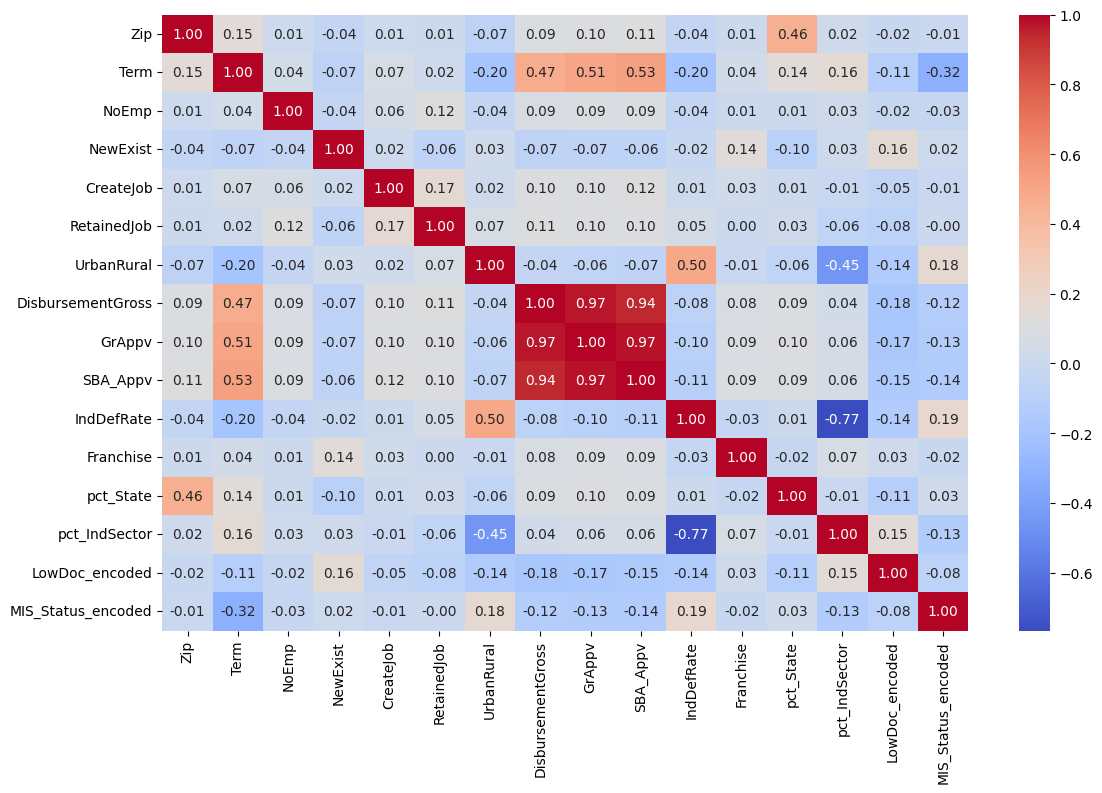

In [163]:
plt.figure(figsize=(13,8))
correlation = df_correlation_check[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

## Observation 1

`DisbursementGross`, `GrAppv`, dan `SBA_Appv` memiliki korelasi cyclic yang sangat tinggi. Di sini, harus dipilih salah satu untuk dikeep.

Jika dibandingkan dengan nilai korelasinya dengan target (`MIS_Status_encoded`), ternyata SBA_Appv memiliki korelasi negatif terbesar dengan MIS_Status_encoded, yang berarti hubungan terkuat dengan target variabel.

Namun karena nilai korelasi dengan target (`MIS_Status_encoded`) antara `DisbursementGross`, `GrAppv`, dan `SBA_Appv` cukup tipis, di sini saya akan mengecek berdasarkan feature importancenya karena feature importance langsung berkontribusi pada kinerja model dan lebih meyakinkan.


In [164]:
X_corr_check = df_train[['DisbursementGross', 'GrAppv', 'SBA_Appv']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['DisbursementGross', 'GrAppv', 'SBA_Appv'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

             Feature  Importance
0  DisbursementGross    0.652656
2           SBA_Appv    0.226523
1             GrAppv    0.120821


Result:

Ternyata `DisbursementGross` memiliki kontribusi terbesar terhadap model prediksi berdasarkan nilai feature importancenya. Hal ini menunjukkan bahwa `DisbursementGross` ini memberikan informasi yang paling berguna untuk model.

Di sini keputusan finalnya adalah:
- Keep `DisbursementGross`
- Drop `GrAppv` dan `SBA_Appv`

In [165]:
df_train = df_train.drop(columns=['GrAppv', 'SBA_Appv'])
df_test = df_test.drop(columns=['GrAppv', 'SBA_Appv'])

In [166]:
numeric_columns = [col for col in numeric_columns if col not in ['GrAppv', 'SBA_Appv']]

## Observation 2

`IndDefRate` dan `pct_IndSector` memiliki nilai korelasi yang cukup tinggi, namun masih di bawah threshold (0.8). Di sini akan saya cek apakah jika prediksi dilakukan dengan salah satu variabel atau dengan kedua variabel akan memberikan dampak perbedaan yang signifikan atau tidak
- Jika tidak signifikan, maka akan saya keep salah satu
- Jika signifikan, maka akan saya keep keduanya

In [167]:
X_2_check = df_train[['IndDefRate', 'pct_IndSector']]
y_check = df_train['MIS_Status_encoded']

X_1_check = df_train[['IndDefRate']]

model = RandomForestClassifier()

# Evaluasi model dengan kedua variabel
scores_both = cross_val_score(model, X_2_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefrate + pct_IndSector: {np.mean(scores_both)}')

# Evaluasi model dengan satu variabel (IndDefRate)
scores_single = cross_val_score(model, X_1_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefRate only: {np.mean(scores_single)}')

Mean Accuracy dengan IndDefrate + pct_IndSector: 0.8231106489985656
Mean Accuracy dengan IndDefRate only: 0.8231106489985656


Result:

Ternyata hasil prediksi antara 1 variabel dengan 2 variabel tidak terlalu jauh. Artinya, sebetulnya antara `IndDefRate` dan `pct_IndSector` memberikan informasi yang mirip dan tidak jauh berbeda. Maka di sini saya putuskan untuk pilih salah satu.

Namun mana yang harus dipilih?

- Berdasarkan nilai korelasi dengan target (`MIS_Status_encoded`), `IndDefRate` memiliki nilai korelasi terkuat dengan target dibandingkan dengan `pct_IndSector`.
- Namun untuk memastikannya lagi, saya akan lakukan feature importance dulu antara `IndDefRate` dan `pct_IndSector` untuk menentukan feature mana yang paling berpengaruh terhadap model.

In [168]:
X_corr_check = df_train[['IndDefRate', 'pct_IndSector']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['IndDefRate', 'pct_IndSector'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

         Feature  Importance
0     IndDefRate    0.574479
1  pct_IndSector    0.425521


Ternyata benar bahwa `IndDefRate` merupakan feature yang paling berpengaruh terhadap model. Maka di sini saya akan keep `IndDefRate` dan drop `pct_IndSector`

In [169]:
df_train = df_train.drop(columns=['pct_IndSector'])
df_test = df_test.drop(columns=['pct_IndSector'])

In [170]:
numeric_columns = [col for col in numeric_columns if col not in ['pct_IndSector']]

Setelah Observation 1 & Observation 2 dilakukan, kita akan sanity check lagi.

In [171]:
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [172]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Zip,1.278504
2,Term,1.508468
3,NoEmp,1.025828
4,NewExist,1.067797
5,CreateJob,1.040941
6,RetainedJob,1.060946
7,UrbanRural,1.381748
8,DisbursementGross,1.349083
9,IndDefRate,1.373609
10,Franchise,1.030989


# Data Standardization (Scaling)

Scaling tidak dilakukan untuk seluruh kolom.

Notes:
Kolom yang perlu dilakukan scaling adalah kolom numerik yang akan digunakan sebagai fitur dalam model machine learning. Kolom yang bersifat kategori atau biner biasanya tidak memerlukan scaling.

Berikut adalah list decision scaling atau tidak:
- Zip: Tidak perlu scaling (kode pos, yang tidak relevan untuk scaling).
- Term: Perlu scaling (Kolom continuous yang relevan untuk model).
- NoEmp: Perlu scaling (jumlah karyawan, relevan untuk model).
- NewExist: Tidak perlu scaling (kategori, biner).
- CreateJob: Perlu scaling (kolom numerik).
- RetainedJob: Perlu scaling (kolom numerik).
- UrbanRural: Tidak perlu scaling (kategori, biner).
- DisbursementGross: Perlu scaling (kolom numerik).
- IndDefRate: Perlu scaling (kolom numerik).
- Franchise: Tidak perlu scaling (kategori, biner).
- pct_State: Perlu scaling (kolom numerik).
- LowDoc_encoded: Tidak perlu scaling (kategori, biner).
- MIS_Status_encoded: Tidak perlu scaling (kategori, biner).

## Train Dataframe

In [173]:
df_train.head(3)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,pct_State,LowDoc_encoded,MIS_Status_encoded
695016,32757,84,1,1,1,1,0,10000,20,0,0.046266,0,0
488153,53076,28,8,1,0,0,2,83900,14,0,0.023481,1,1
532245,59270,144,6,1,0,6,2,173300,20,0,0.009722,0,0


In [174]:
columns_to_scale = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'IndDefRate', 'pct_State']

In [175]:
df_train_scaled_backup = df_train.copy()

In [176]:
df_train[columns_to_scale] = StandardScaler().fit_transform(df_train[columns_to_scale])

## Test Dataframe

In [177]:
df_test.head(3)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,pct_State,LowDoc_encoded,MIS_Status_encoded
395280,43026,243,2,1,0,0,1,150000,0,0,0.035639,0,0
451751,28027,36,2,2,0,2,2,16000,22,0,0.016161,0,0
239682,54130,26,19,1,0,19,1,272480,16,0,0.023144,0,1


In [178]:
df_test_scaled_backup = df_test.copy()

In [179]:
df_test[columns_to_scale] = StandardScaler().fit_transform(df_test[columns_to_scale])

In [180]:
df_test.head(1)

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,pct_State,LowDoc_encoded,MIS_Status_encoded
395280,43026,1.700678,-0.130429,1,-0.113799,-0.245584,1,-0.176974,-1.723589,0,-0.250594,0,0


# Data Split (Train + Val, Test)

Di sini, saya akan membagi `df_train` menjadi proporsi sebagai berikut:
- 20% dari `df_train` digunakan sebagai Validation Data
- 80% dari `df_train` tetap sebagai Train Data

Validation data ini nantinya akan digunakan untuk membantu memilih dan setting kombinasi hyperparameter yang memberikan kinerja terbaik.

In [181]:
df_train_new, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# Modeling

## X & y Split

In [184]:
X_train = df_train_new.drop('MIS_Status_encoded', axis=1)
y_train = df_train_new['MIS_Status_encoded']
X_val = df_val.drop('MIS_Status_encoded', axis=1)
y_val = df_val['MIS_Status_encoded']
X_test = df_test.drop('MIS_Status_encoded', axis=1)
y_test = df_test['MIS_Status_encoded']

## SMOTE

In [187]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [189]:
y_train.value_counts()

MIS_Status_encoded
1    409011
0    409011
Name: count, dtype: int64

## Initialize Models

In [188]:
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()

## Model Training

In [190]:
model_list = [lgb_model, xgb_model, rf_model, lr_model, knn_model]
model_name_list = ["LightGBM", "XGBoost", "RandomForest", "LogisticRegression", "KNN"]

for model in model_list:
  model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 409011, number of negative: 409011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 818022, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


## Testing & Evaluation

### Testing on Validation Data

In [191]:
for model, name in zip(model_list, model_name_list):
    y_val_pred = model.predict(X_val)
    test_accuracy = accuracy_score(y_val, y_val_pred)

    print(f"{name} Validation Dataset Accuracy: {test_accuracy}")
    print(f"{name} Validation Classification Report:\n{classification_report(y_val, y_val_pred)}")

LightGBM Validation Dataset Accuracy: 0.9398519233864477
LightGBM Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    102386
           1       0.84      0.81      0.83     21874

    accuracy                           0.94    124260
   macro avg       0.90      0.89      0.89    124260
weighted avg       0.94      0.94      0.94    124260

XGBoost Validation Dataset Accuracy: 0.9414373088685015
XGBoost Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    102386
           1       0.85      0.81      0.83     21874

    accuracy                           0.94    124260
   macro avg       0.90      0.89      0.90    124260
weighted avg       0.94      0.94      0.94    124260

RandomForest Validation Dataset Accuracy: 0.9358281023660068
RandomForest Validation Classification Report:
              precision    recall  f1-sc

### Testing on Test Data

LightGBM Test Dataset Accuracy: 0.2797773529489091
LightGBM Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.13      0.22    219196
           1       0.20      1.00      0.33     47055

    accuracy                           0.28    266251
   macro avg       0.60      0.56      0.28    266251
weighted avg       0.85      0.28      0.24    266251



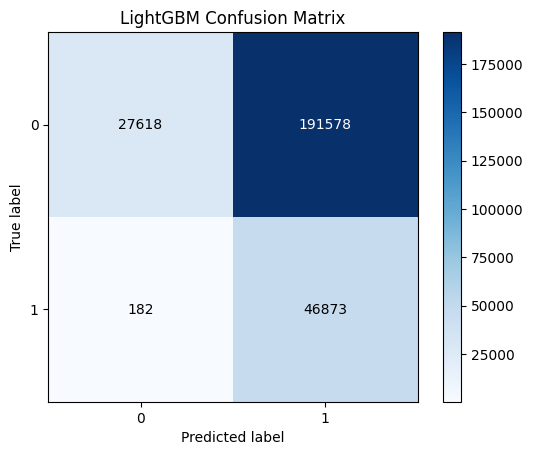



XGBoost Test Dataset Accuracy: 0.30056225140938436
XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.15      0.26    219196
           1       0.20      1.00      0.33     47055

    accuracy                           0.30    266251
   macro avg       0.60      0.57      0.30    266251
weighted avg       0.85      0.30      0.28    266251



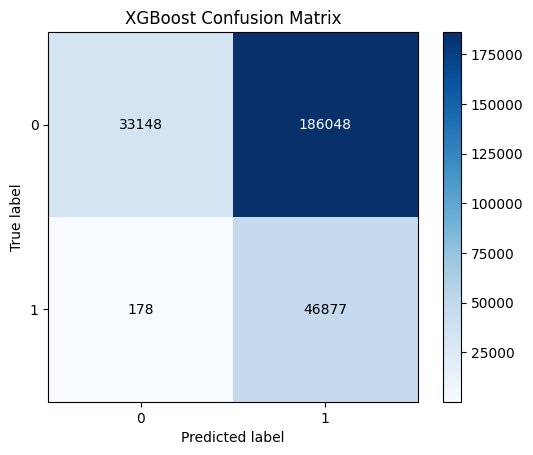



RandomForest Test Dataset Accuracy: 0.3018542653360926
RandomForest Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.15      0.27    219196
           1       0.20      0.99      0.33     47055

    accuracy                           0.30    266251
   macro avg       0.59      0.57      0.30    266251
weighted avg       0.85      0.30      0.28    266251



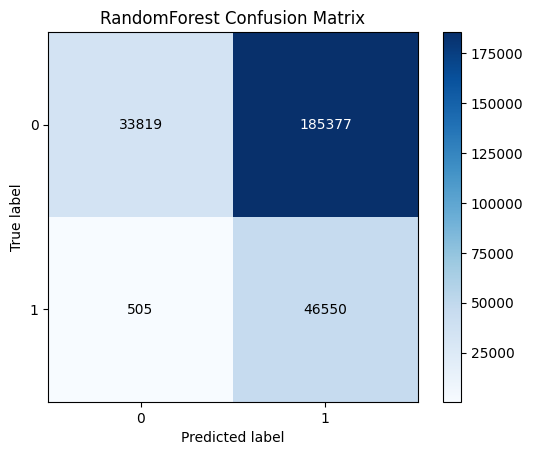



LogisticRegression Test Dataset Accuracy: 0.6054249561503995
LogisticRegression Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70    219196
           1       0.29      0.84      0.43     47055

    accuracy                           0.61    266251
   macro avg       0.61      0.70      0.56    266251
weighted avg       0.83      0.61      0.65    266251



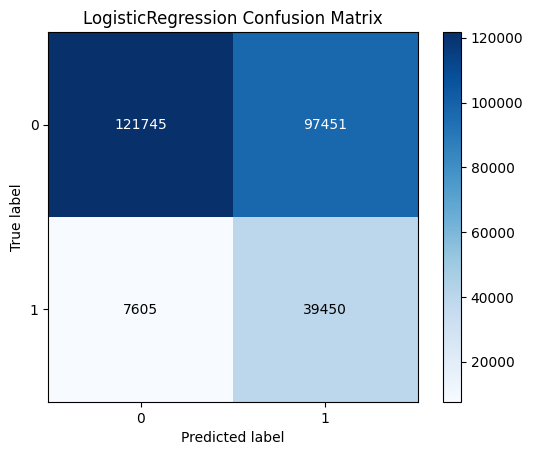



KNN Test Dataset Accuracy: 0.7404629466180409
KNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83    219196
           1       0.37      0.67      0.48     47055

    accuracy                           0.74    266251
   macro avg       0.64      0.71      0.65    266251
weighted avg       0.82      0.74      0.77    266251



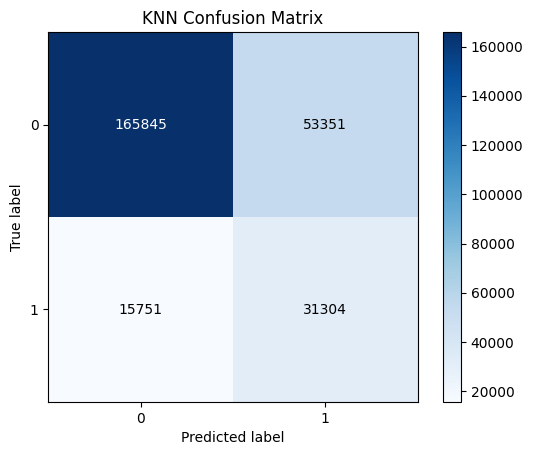

In [192]:
for model, name in zip(model_list, model_name_list):
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{name} Test Dataset Accuracy: {test_accuracy}")
    print(f"{name} Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

    skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, title=f"{name} Confusion Matrix")
    plt.show()
    print("\n")

### Overfitting Insight

Hasil metric tidak menunjukkan tanda-tanda overfitting. Performa pada validation set dan test set sangat mirip, menunjukkan bahwa model memiliki performa yang baik pada data yang belum pernah dilihat sebelumnya (test data)